In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function 
#print('Print function from python 3')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

import calendar
import datetime

In [2]:
df = pd.read_csv('turnstile_180310.txt')

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df['turnstile_id'] = df['C/A'] + '_' + df['UNIT'] + '_' + df['SCP'] + '_' + df['STATION']

In [5]:
df['date'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,03:00:00,REGULAR,6535802,2213345,A002_R051_02-00-00_59 ST,2018-03-03
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,07:00:00,REGULAR,6535813,2213356,A002_R051_02-00-00_59 ST,2018-03-03
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,11:00:00,REGULAR,6535865,2213436,A002_R051_02-00-00_59 ST,2018-03-03
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,15:00:00,REGULAR,6536048,2213481,A002_R051_02-00-00_59 ST,2018-03-03
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,19:00:00,REGULAR,6536326,2213531,A002_R051_02-00-00_59 ST,2018-03-03


In [7]:
df['DATE_TIME'] = df['DATE'] + ' ' + df['TIME']

In [8]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],format="%m/%d/%Y %H:%M:%S")

In [9]:
df.sample(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date,DATE_TIME
106633,N601A,R319,01-00-01,LEXINGTON AV/63,F,IND,03/08/2018,19:00:00,REGULAR,436918,344076,N601A_R319_01-00-01_LEXINGTON AV/63,2018-03-08,2018-03-08 19:00:00
86807,N339A,R114,00-00-00,PARSONS BLVD,F,IND,03/05/2018,11:00:00,REGULAR,2968219,11216708,N339A_R114_00-00-00_PARSONS BLVD,2018-03-05,2018-03-05 11:00:00
132836,R143,R032,02-03-01,TIMES SQ-42 ST,1237ACENQRSW,IRT,03/07/2018,19:00:00,REGULAR,1444792,1733903,R143_R032_02-03-01_TIMES SQ-42 ST,2018-03-07,2018-03-07 19:00:00
36026,J001,R460,01-00-01,MARCY AV,JMZ,BMT,03/06/2018,16:00:00,REGULAR,8236881,2294558,J001_R460_01-00-01_MARCY AV,2018-03-06,2018-03-06 16:00:00
196790,R726,R329,00-00-02,MORRIS PARK,5,IRT,03/09/2018,12:00:00,REGULAR,5644746,1341725,R726_R329_00-00-02_MORRIS PARK,2018-03-09,2018-03-09 12:00:00
44216,N023,R332,01-00-01,135 ST,BC,IND,03/05/2018,04:00:00,REGULAR,72904,143375,N023_R332_01-00-01_135 ST,2018-03-05,2018-03-05 04:00:00
128418,R122,R290,02-05-00,HOUSTON ST,1,IRT,03/09/2018,12:00:00,REGULAR,414,0,R122_R290_02-05-00_HOUSTON ST,2018-03-09,2018-03-09 12:00:00
192971,R626,R062,00-05-01,CROWN HTS-UTICA,34,IRT,03/05/2018,19:00:00,REGULAR,2,880,R626_R062_00-05-01_CROWN HTS-UTICA,2018-03-05,2018-03-05 19:00:00
88694,N343,R019,00-05-00,JAMAICA 179 ST,F,IND,03/03/2018,23:00:00,REGULAR,746,0,N343_R019_00-05-00_JAMAICA 179 ST,2018-03-03,2018-03-03 23:00:00
39861,J037,R009,00-00-02,121 ST,JZ,BMT,03/06/2018,15:00:00,REGULAR,767011,272475,J037_R009_00-00-02_121 ST,2018-03-06,2018-03-06 15:00:00


In [10]:
df_temp=df[['turnstile_id','date','DATE_TIME','ENTRIES','EXITS','STATION']]

In [11]:
df_temp.head(10)

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
0,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 03:00:00,6535802,2213345,59 ST
1,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 07:00:00,6535813,2213356,59 ST
2,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 11:00:00,6535865,2213436,59 ST
3,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 15:00:00,6536048,2213481,59 ST
4,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 19:00:00,6536326,2213531,59 ST
5,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 23:00:00,6536487,2213562,59 ST
6,A002_R051_02-00-00_59 ST,2018-03-04,2018-03-04 03:00:00,6536518,2213570,59 ST
7,A002_R051_02-00-00_59 ST,2018-03-04,2018-03-04 07:00:00,6536526,2213579,59 ST
8,A002_R051_02-00-00_59 ST,2018-03-04,2018-03-04 11:00:00,6536576,2213626,59 ST
9,A002_R051_02-00-00_59 ST,2018-03-04,2018-03-04 15:00:00,6536723,2213669,59 ST


In [12]:
df_temp1=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME'])
 .groupby(['turnstile_id','date','STATION'])
 .diff())

In [13]:
df_temp1.head()

,DATE_TIME,ENTRIES,EXITS
0,NaT,NaN,NaN
1,04:00:00,11.0,11.0
2,04:00:00,52.0,80.0
3,04:00:00,183.0,45.0
4,04:00:00,278.0,50.0


In [14]:
df_temp2=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME']))

In [15]:
df_temp2.head()

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
0,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 03:00:00,6535802,2213345,59 ST
1,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 07:00:00,6535813,2213356,59 ST
2,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 11:00:00,6535865,2213436,59 ST
3,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 15:00:00,6536048,2213481,59 ST
4,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 19:00:00,6536326,2213531,59 ST


In [16]:
df_temp1['turnstile_id']=df_temp2['turnstile_id']

In [17]:
df_temp1['STATION']=df_temp2['STATION']

In [18]:
df_temp1['date']=df_temp2['date']

In [19]:
df_temp1.head(20)

,DATE_TIME,ENTRIES,EXITS,turnstile_id,STATION,date
0,NaT,NaN,NaN,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
1,04:00:00,11.0,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
2,04:00:00,52.0,80.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
3,04:00:00,183.0,45.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
4,04:00:00,278.0,50.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
5,04:00:00,161.0,31.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
6,NaT,NaN,NaN,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
7,04:00:00,8.0,9.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
8,04:00:00,50.0,47.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
9,04:00:00,147.0,43.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04


In [20]:
df_temp1.dropna(axis=0,inplace=True)

In [21]:
df_final=pd.DataFrame()
df_final=df_temp1[['ENTRIES','turnstile_id','STATION','date']]

In [22]:
df_final.head()

,ENTRIES,turnstile_id,STATION,date
1,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
2,52.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
3,183.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
4,278.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
5,161.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03


In [24]:
df_final1=(df_final
 .groupby(['turnstile_id','date','STATION'])
 .sum())

In [25]:
df_final1['ENTRIES'].max()

10128.0

In [26]:
df_final1.reset_index(inplace=True)

In [27]:
df_anal=df_final1.reset_index()

In [28]:
df_anal.head()

,index,turnstile_id,date,STATION,ENTRIES
0,0,A002_R051_02-00-00_59 ST,2018-03-03,59 ST,685.0
1,1,A002_R051_02-00-00_59 ST,2018-03-04,59 ST,519.0
2,2,A002_R051_02-00-00_59 ST,2018-03-05,59 ST,1379.0
3,3,A002_R051_02-00-00_59 ST,2018-03-06,59 ST,1472.0
4,4,A002_R051_02-00-00_59 ST,2018-03-07,59 ST,979.0


In [29]:
station_entry_count = (df_final.groupby(by='STATION', as_index=False)
         .sum()[['STATION','ENTRIES']]
         .sort_values('ENTRIES', ascending=False))

In [30]:
top_20_station_entry_count=station_entry_count.head(20)

In [31]:
top_20_unique_station=top_20_station_entry_count['STATION'].unique()

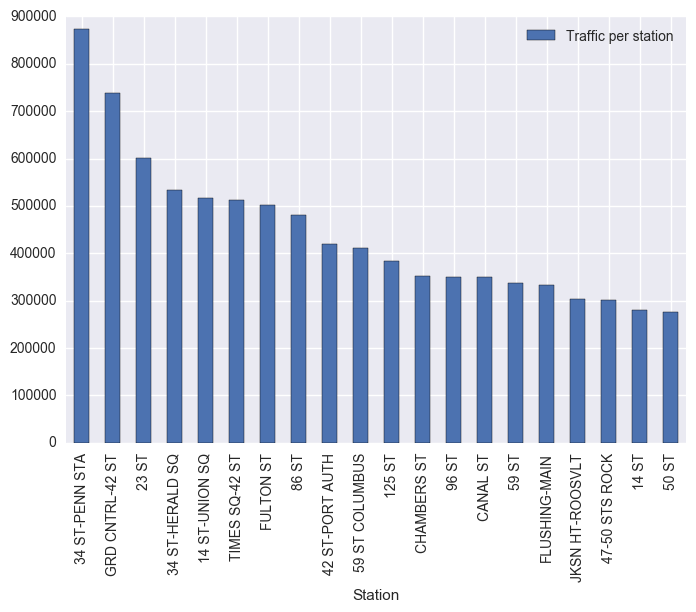

In [32]:
top_20_station_entry_count.plot(kind='bar', x='STATION', y='ENTRIES',label='Traffic per station')
plt.xlabel('Station')

In [32]:
df_anal['day_of_week'] = [calendar.day_name[i.weekday()] for i in df_anal.date]

In [ ]:
df_final.head()

In [57]:
df_anal=df_anal.groupby(by=['STATION','day_of_week']).sum()[['ENTRIES']].sort_values('ENTRIES', ascending=False)

In [58]:
df_anal.reset_index(inplace=True)

In [59]:
df_anal.head()

,STATION,day_of_week,ENTRIES
0,34 ST-PENN STA,Tuesday,170553.0
1,34 ST-PENN STA,Monday,163475.0
2,34 ST-PENN STA,Friday,153274.0
3,34 ST-PENN STA,Thursday,147467.0
4,GRD CNTRL-42 ST,Tuesday,147214.0


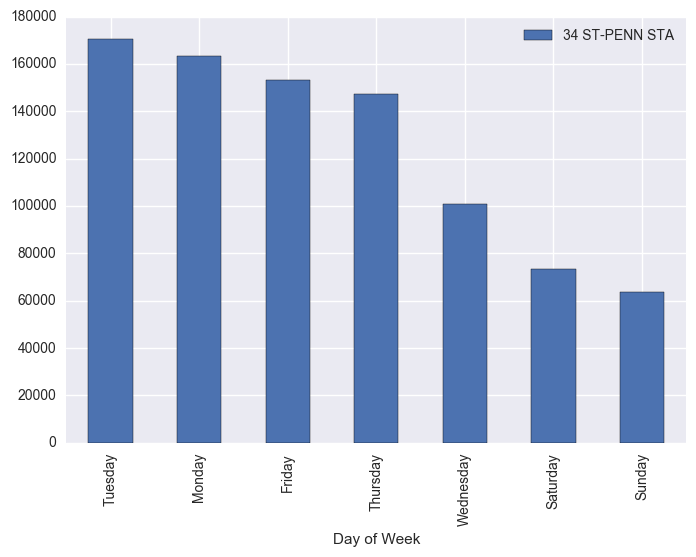

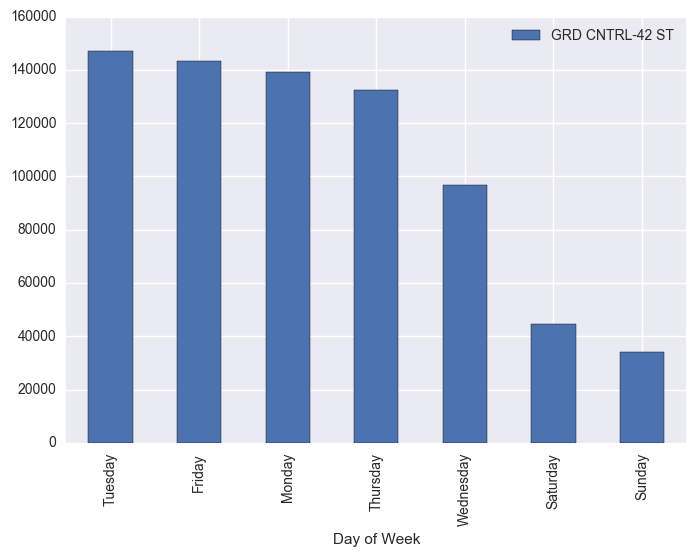

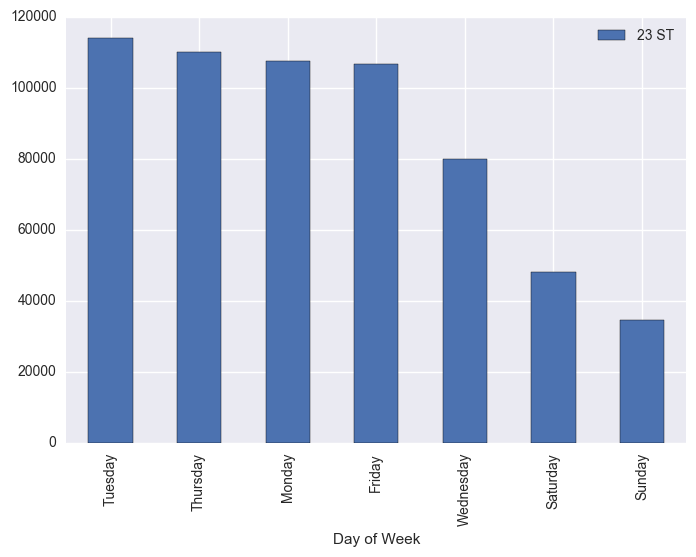

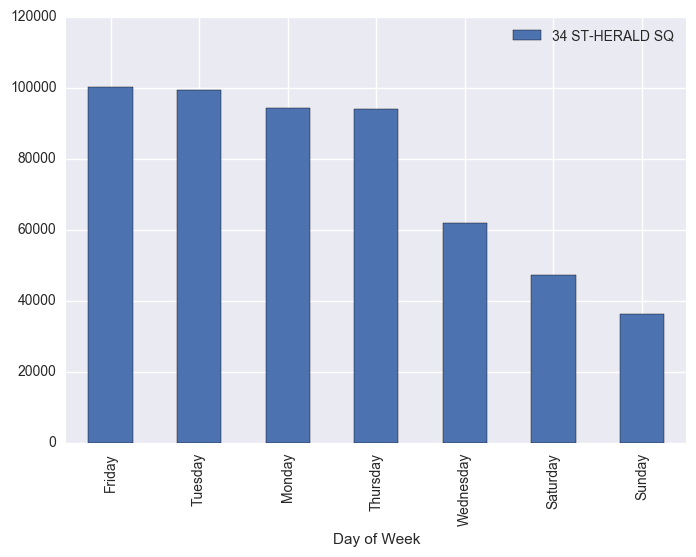

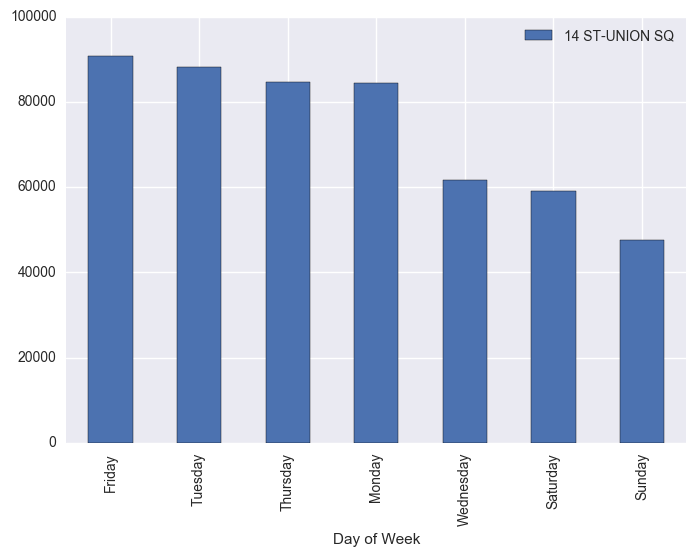

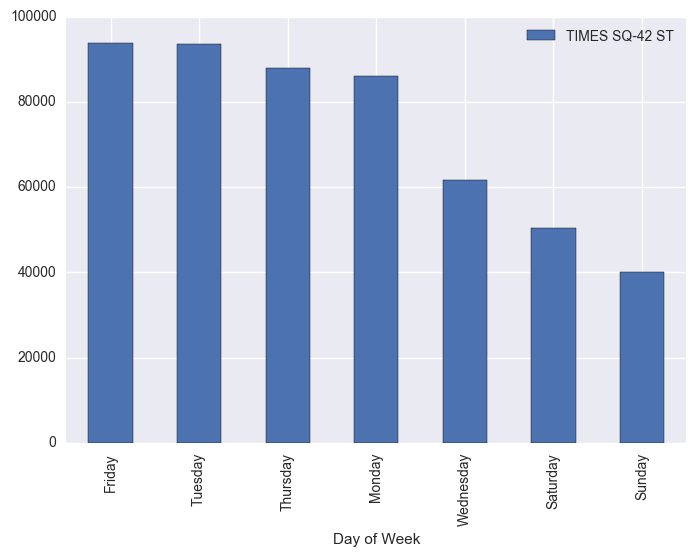

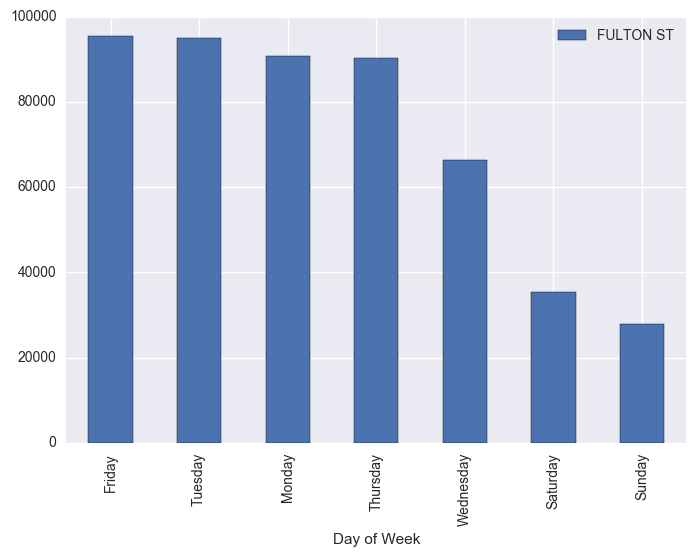

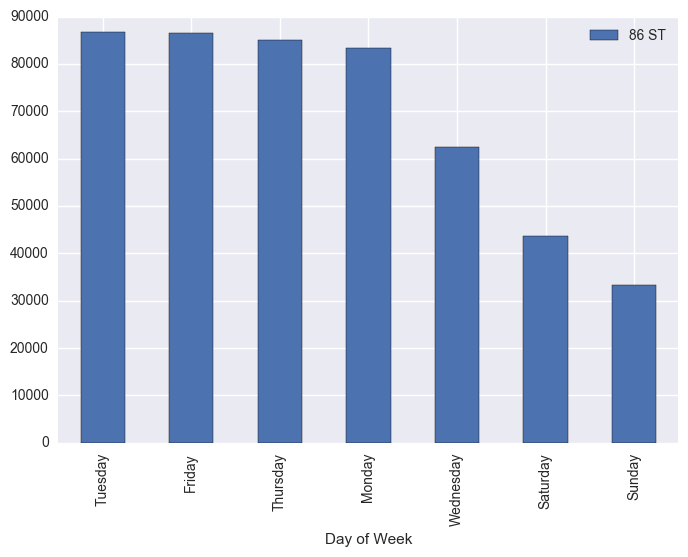

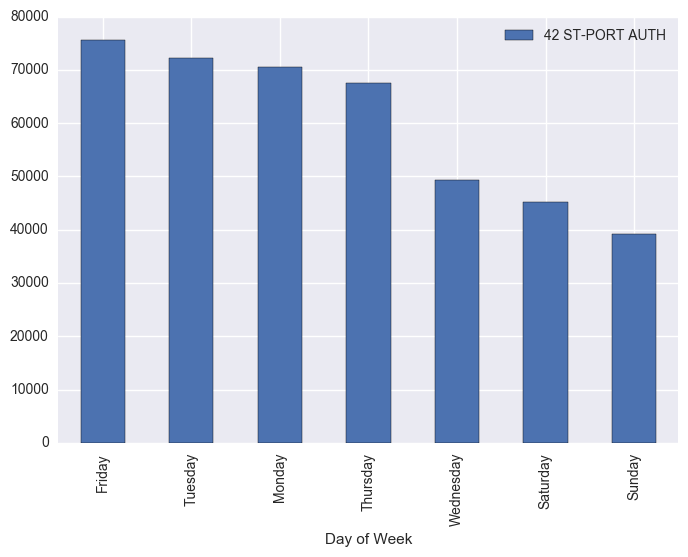

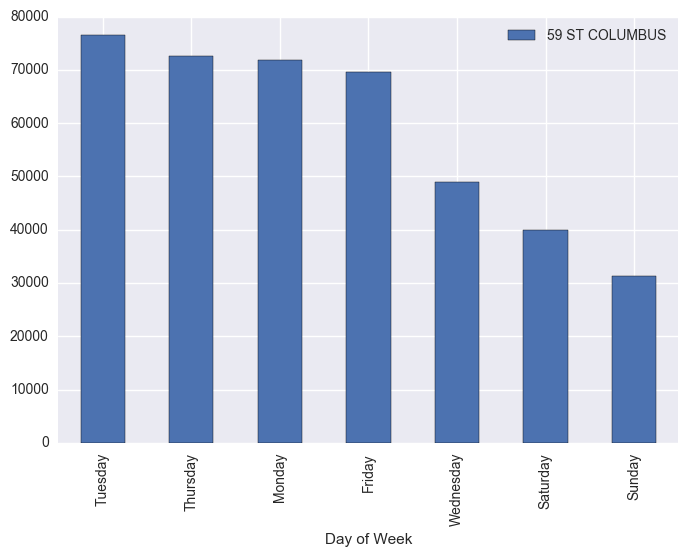

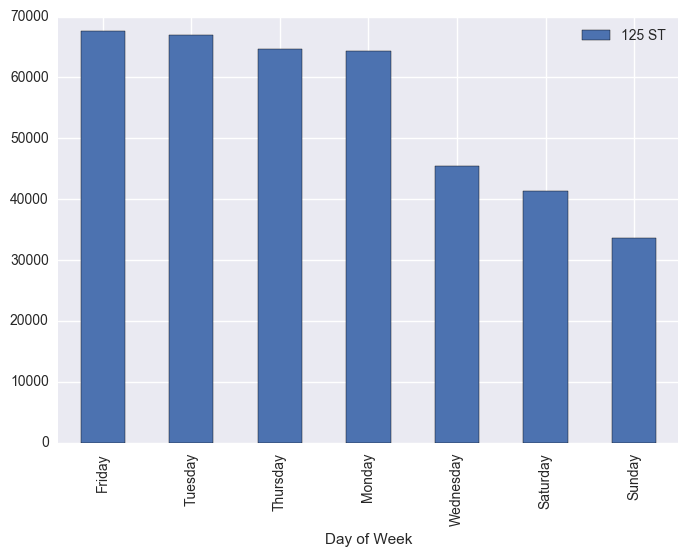

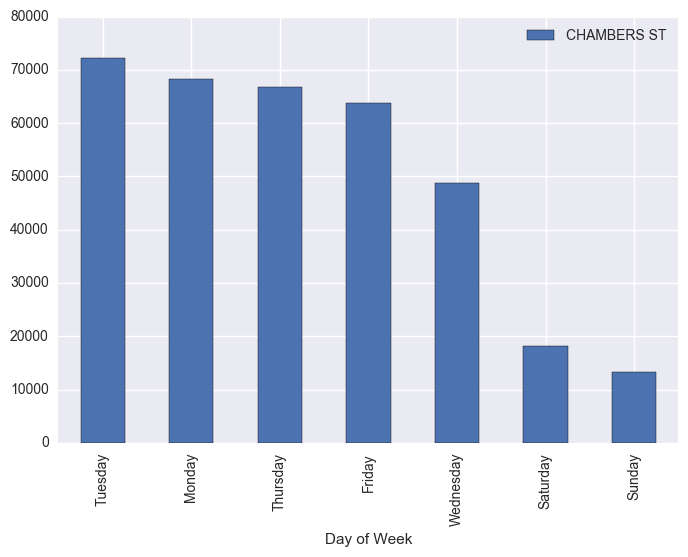

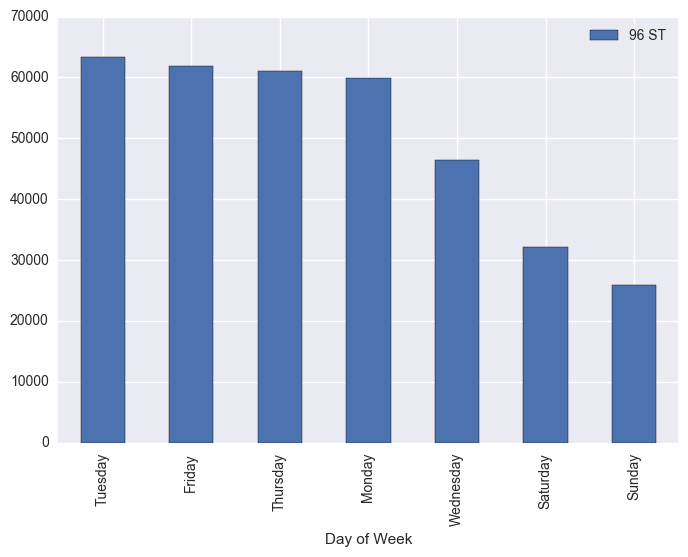

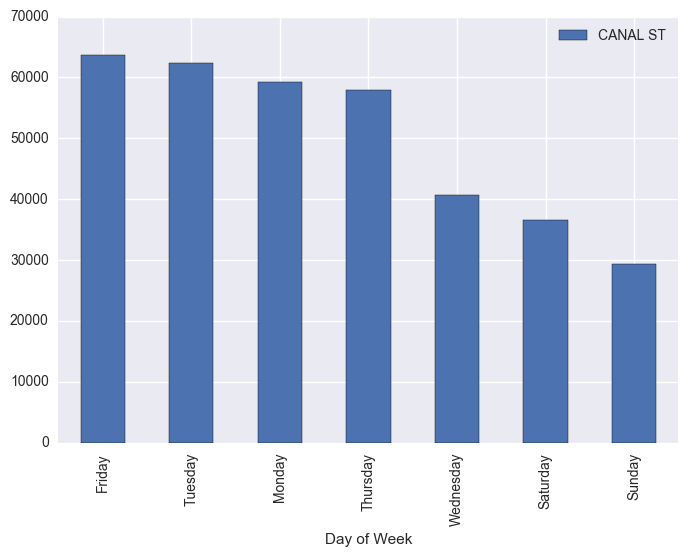

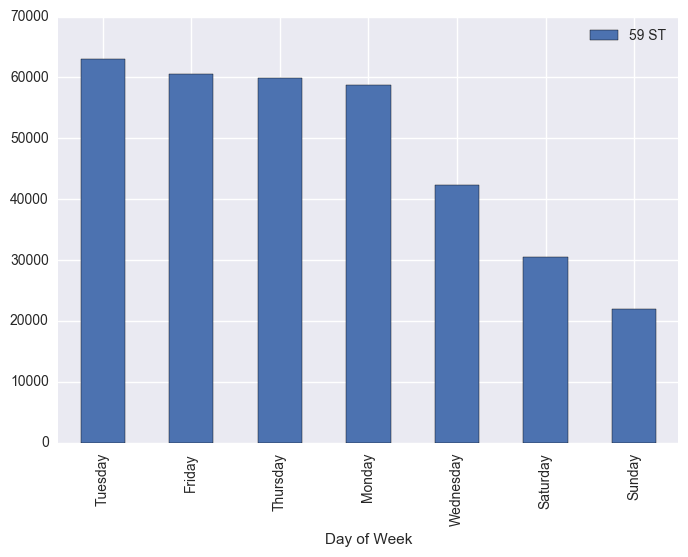

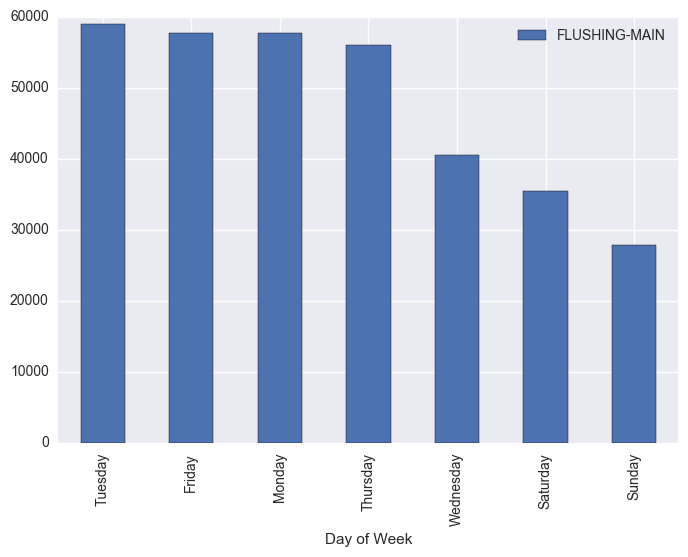

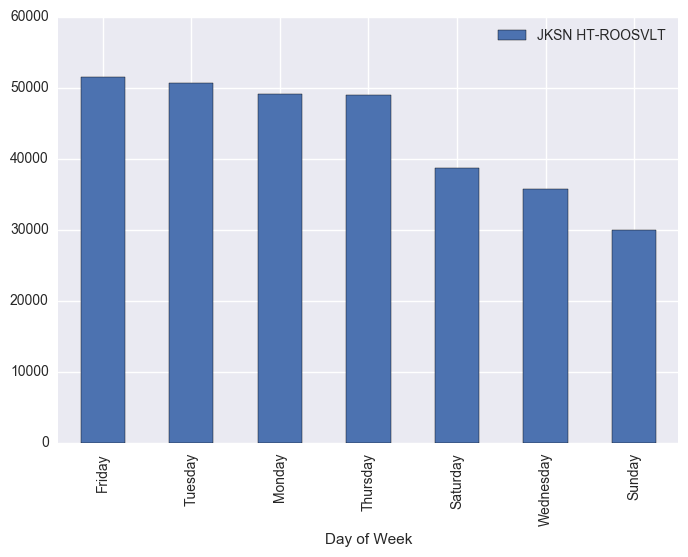

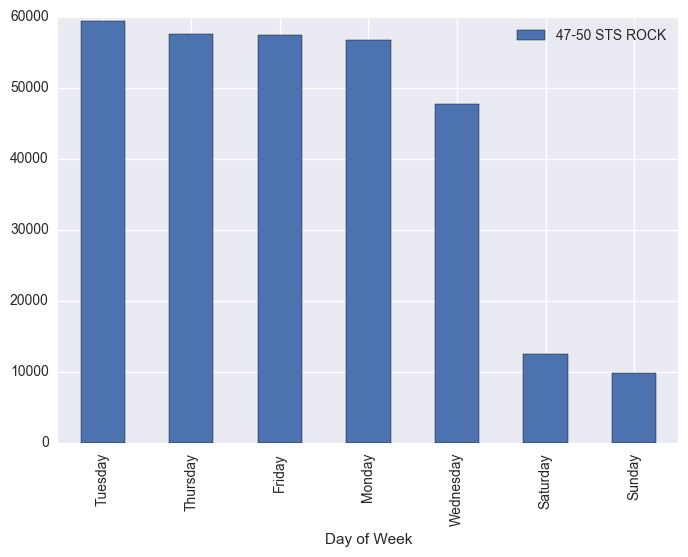

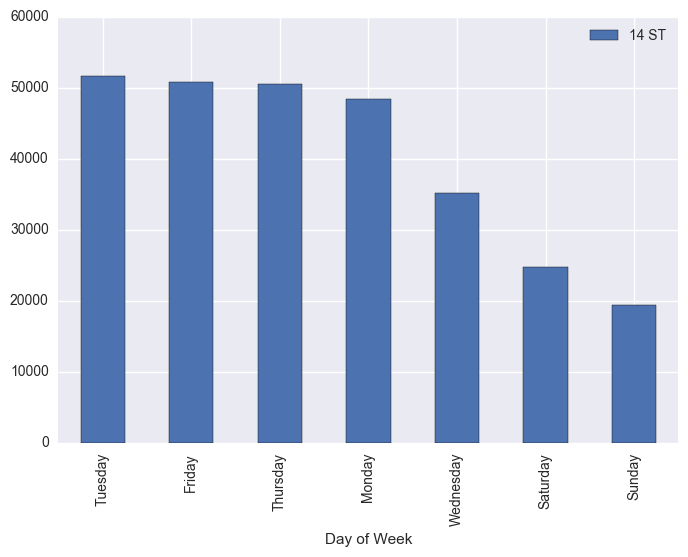

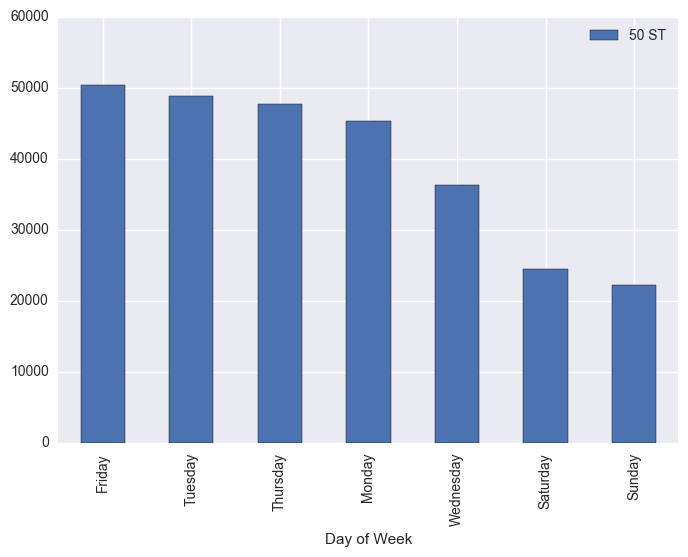

In [66]:
#df_list_kelly = []
for s in top_20_unique_station:
    #print(s)
    df_new=pd.DataFrame()
    df_new=df_anal[df_anal['STATION']==s]
    #df_list_kelly.append(df_new)
    df_new.plot(kind='bar', x='day_of_week', y='ENTRIES',label=s)
    plt.xlabel('Day of Week')
#df_kelly = pd.concat(df_list_kelly)    

In [61]:
df_kelly.head() 

,STATION,day_of_week,ENTRIES
0,34 ST-PENN STA,Tuesday,170553.0
1,34 ST-PENN STA,Monday,163475.0
2,34 ST-PENN STA,Friday,153274.0
3,34 ST-PENN STA,Thursday,147467.0
12,34 ST-PENN STA,Wednesday,101054.0


In [62]:
df_kelly_final=pd.DataFrame()
df_kelly_final=df_kelly[['STATION','ENTRIES']]

In [63]:
df_kelly_final

,STATION,ENTRIES
0,34 ST-PENN STA,170553.0
1,34 ST-PENN STA,163475.0
2,34 ST-PENN STA,153274.0
3,34 ST-PENN STA,147467.0
12,34 ST-PENN STA,101054.0
37,34 ST-PENN STA,73437.0
54,34 ST-PENN STA,63618.0
4,GRD CNTRL-42 ST,147214.0
5,GRD CNTRL-42 ST,143439.0
6,GRD CNTRL-42 ST,139224.0


In [64]:
df_kelly_final.to_csv('for_kelly.csv',index= False)